In [15]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.


'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.noise import AlphaDropout
from keras.utils import np_utils
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 35

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

historyMLP = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
scoreMLP = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scoreMLP[0])
print('Test accuracy:', scoreMLP[1])

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/35
60000/60000 [=======================

In [16]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.


'''

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.noise import AlphaDropout
from keras.utils import np_utils
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 35

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

modelSELU = Sequential()
modelSELU.add(Dense(512, activation='selu', input_shape=(784,)))
modelSELU.add(AlphaDropout(0.2))
modelSELU.add(Dense(512, activation='selu'))
modelSELU.add(AlphaDropout(0.2))
modelSELU.add(Dense(10, activation='softmax'))

modelSELU.summary()

modelSELU.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

historySELU = modelSELU.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
scoreSELU = modelSELU.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scoreSELU[0])
print('Test accuracy:', scoreSELU[1])

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
alpha_dropout_3 (AlphaDropou (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
alpha_dropout_4 (AlphaDropou (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/35
60000/60000 [=======================

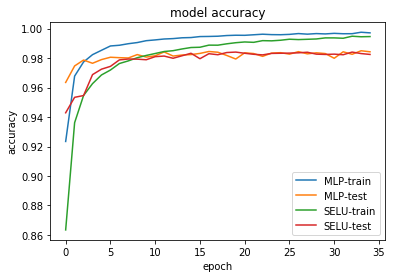

In [17]:
import matplotlib.pyplot as plt
import pylab

plt.plot(historyMLP.history['acc'])
plt.plot(historyMLP.history['val_acc'])
plt.plot(historySELU.history['acc'])
plt.plot(historySELU.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['MLP-train', 'MLP-test','SELU-train', 'SELU-test'], loc='lower right')
plt.show()

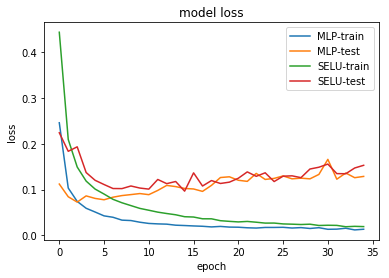

In [18]:
plt.plot(historyMLP.history['loss'])
plt.plot(historyMLP.history['val_loss'])
plt.plot(historySELU.history['loss'])
plt.plot(historySELU.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['MLP-train', 'MLP-test', 'SELU-train', 'SELU-test'], loc='upper right')
plt.show()